In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dtypes = {'Orden': str, 'Número material': str, 'Texto breve material': str, 'Lote': str, 'Fecha de inicio real': str, 'Fecha de fin real': str, 'Cantidad entregada': float, 'Unidad de medida' : str}
parse_dates = ['Fecha de inicio real', 'Fecha de fin real']
of = pd.read_excel('../../data/raw/OF 123456 v02.xlsx', dtype=dtypes)
#of['Fecha de inicio real'] = pd.to_datetime(of['Fecha de inicio real'])
#of['Fecha de fin real'] = pd.to_datetime(of['Fecha de fin real'])

of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Orden                 207 non-null    object 
 1   Número material       207 non-null    object 
 2   Texto breve material  207 non-null    object 
 3   Lote                  207 non-null    object 
 4   Cantidad entregada    207 non-null    float64
 5   Unidad de medida      207 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.8+ KB


In [36]:
of.head()

,Orden,Número material,Texto breve material,Lote,Cantidad entregada,Unidad de medida
0,200178572,123456,MATERIAL DESCRITION,23/019,13.8,L
1,200179217,123456,MATERIAL DESCRITION,23/020,13.6,L
2,200181620,123456,MATERIAL DESCRITION,23/021,13.5,L
3,200182428,123456,MATERIAL DESCRITION,23/022,13.8,L
4,200182429,123456,MATERIAL DESCRITION,23/023,13.7,L


# Sanity checks

In [37]:
#Drop column 'Texto breve material' because it is not useful
of.drop(columns=['Texto breve material'], inplace=True)

In [38]:
# Check Unidad de medida if it is always L
print(of['Unidad de medida'].unique())

['L']


In [39]:
# Drop column 'Unidad de medida' because it is always L
of.drop(columns=['Unidad de medida'], inplace=True)

In [40]:
# Numero material unique values
print(of['Número material'].value_counts())

Número material
123456    207
Name: count, dtype: int64


In [41]:
# Makes sense there is only one antigen material for our study. Drop column 'Número material' as it does not add any information
of.drop(columns=['Número material'], inplace=True)

### We end up with 5 columns. 2 Out of them are 2 dates in datetime format, another 2 are identifiers and the last one is a number.

In [42]:
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               207 non-null    object 
 1   Lote                207 non-null    object 
 2   Cantidad entregada  207 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [43]:
# Number of repeated rows
print(of.duplicated().sum())

0


# Columns

## Orden


In [44]:
# Let's be sure Orden is unique
print(of['Orden'].nunique()==of.shape[0])

True


In [45]:
# We dont need Orden as an int for this use case. It is an identifier. Let's convert it to a string
of['Orden'] = of['Orden'].astype(str)

In [46]:
# Look for weird values with regex
print('Number of values with non-word characters: ' + str(of['Orden'].str.count('\W').sum()))
print('Number of values with non-digit characters: ' + str(of['Orden'].str.count('\D').sum()))

Number of values with non-word characters: 0
Number of values with non-digit characters: 0


In [47]:
# Look if the number of digits is consistent
print(of[~of['Orden'].str.match('^\d{9}$')])

        Orden    Lote  Cantidad entregada
42   10005176  P23273               13.80
93   10005233  23/121               13.60
99   10005235  23/126               13.60
100  10005236  23/127               13.60
139  10005271  24/038               13.89


In [48]:
# Prefixes 
print(of['Orden'].str.extract('(^\d{3})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{3})\d*')[0].value_counts())

print(of['Orden'].str.extract('(^\d{4})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{4})\d*')[0].value_counts())

print(of['Orden'].str.extract('(^\d{5})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{5})\d*')[0].value_counts())

['200' '100']
0
200    202
100      5
Name: count, dtype: int64
['2001' '1000' '2002']
0
2001    131
2002     71
1000      5
Name: count, dtype: int64
['20017' '20018' '10005' '20019' '20020']
0
20019    76
20020    71
20018    53
10005     5
20017     2
Name: count, dtype: int64


In [49]:
print(of['Orden'].str.extract('(^\d{6})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{6})\d*')[0].value_counts())

['200178' '200179' '200181' '200182' '200185' '200184' '200187' '100051'
 '200188' '200191' '200195' '200196' '100052' '200197' '200199' '200200'
 '200202' '200203' '200205']
0
200196    39
200205    30
200191    28
200200    27
200182    18
200202    12
200188    11
200184    11
200187    10
200195     6
100052     4
200203     2
200199     2
200185     2
200178     1
200181     1
200179     1
100051     1
200197     1
Name: count, dtype: int64


### It is likely Orden is a combination of codes. With likely the first 4(5?) digits being a category of something.

In [50]:
# Suffixes
#Which do not match this regex? (None)
print(of[~of['Orden'].str.match('^\d*(\d{3})$')])
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts())

Empty DataFrame
Columns: [Orden, Lote, Cantidad entregada]
Index: []
0  
388    2
385    2
233    2
386    2
387    2
      ..
906    1
907    1
908    1
909    1
910    1
Name: count, Length: 195, dtype: int64


In [51]:
# Number of unique values
print(of['Orden'].str.extract('^\d*(\d{3})$').nunique())
# (SEE ALSO: of['Orden'].str.slice(start=-3) )
# How many times are they repeated?
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts().value_counts())
# Which are the ones that are repeated more than once?
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts()[of['Orden'].str.extract('^\d*(\d{3})$').value_counts()>1])

# Put them on a list
repeated_suffixes = of['Orden'].str.extract('^\d*(\d{3})$').value_counts()[of['Orden'].str.extract('^\d*(\d{3})$').value_counts()>1].index.tolist()
# Flatten the list
repeated_suffixes = [item for sublist in repeated_suffixes for item in sublist]

0    195
dtype: int64
count
1    183
2     12
Name: count, dtype: int64
0  
388    2
385    2
233    2
386    2
387    2
877    2
534    2
533    2
440    2
441    2
400    2
878    2
Name: count, dtype: int64


In [52]:
# Filter all the elements in the column that their 3 last digits are in the list

of[of['Orden'].str.extract('^\d*(\d{3})$')[0].isin(repeated_suffixes)]
# Sort the values by their last 3 digits
#Use lock to avoid the SettingWithCopyWarning
filtered_df = of[of['Orden'].str.extract('^\d*(\d{3})$')[0].isin(repeated_suffixes)].copy()
filtered_df['Last3Digits'] = filtered_df['Orden'].str[-3:]

filtered_df.sort_values(by='Last3Digits')


,Orden,Lote,Cantidad entregada,Last3Digits
93,10005233,23/121,13.60,233
145,200200233,24/044,13.75,233
149,200200385,24/051,13.83,385
67,200191385,23/092,13.80,385
150,200200386,24/053,13.75,386
69,200191386,23/094,13.70,386
70,200191387,23/095,13.70,387
144,200200387,24/046,13.71,387
151,200200388,24/052,13.78,388
71,200191388,23/096,13.30,388


### There is some incremental nature to Orden, and we are obviously missing numbers in between that do not correspond to the material. We cannot conclude that there are other antigens in production between Orders but it is highly likely.

### Still there's an strong indication that the first 3/4 digits could mean something else that is not an incremental number, but some kind of category or change in procedures. Could be a potential line for investigation.

In [53]:
# Are the last 3 digits in the original dataframe incremental?
# Slice orden
of['Orden'].str[-3:].astype(int).diff().value_counts()


Orden
 1.0      93
 3.0       8
 2.0       8
 4.0       5
-3.0       3
          ..
-296.0     1
 446.0     1
-6.0       1
-8.0       1
 9.0       1
Name: count, Length: 77, dtype: int64

In [54]:
# Sort of by Orden
of = of.sort_values(by='Orden')
# Show first 20 rows
of.head(20)

,Orden,Lote,Cantidad entregada
42,10005176,P23273,13.80
93,10005233,23/121,13.60
99,10005235,23/126,13.60
100,10005236,23/127,13.60
139,10005271,24/038,13.89
0,200178572,23/019,13.80
1,200179217,23/020,13.60
2,200181620,23/021,13.50
3,200182428,23/022,13.80
4,200182429,23/023,13.70


## Lote

In [55]:
# Let's be sure Lote is unique
print(of['Lote'].nunique()==of.shape[0])

True


In [56]:
# Lote does not follow the same pattern as in the other files. Let's see if we can convert the identifier.
# First to string
of['Lote'] = of['Lote'].astype(str)

In [57]:
# Now remove /
of['Lote'] = of['Lote'].apply(lambda x: x.replace("/",""))

In [58]:
# Check now for unique values
print(of['Lote'].nunique()==of.shape[0])

True


In [59]:
# Are all of them digits?
print(of['Lote'].str.isdigit().all())

False


In [60]:
# Lets have a final look at the Lote column
print(of['Lote'].head())
print(of['Lote'].tail())
print(of['Lote'].sample(5))
# Check for weird values with regex
print('Number of non-word characters: ' + str(of['Lote'].str.contains(r'\W').sum()))
print('Number of non-digit characters: ' + str(of['Lote'].str.contains(r'\D').sum()))
#Print the values that contain non-digit characters (FOUND YOU!)
print(of['Lote'][of['Lote'].str.contains(r'\D')])

42     P23273
93      23121
99      23126
100     23127
139     24038
Name: Lote, dtype: object
201    24105
203    24106
204    24107
197    24100
199    24101
Name: Lote, dtype: object
3      23022
188    24091
91     23116
187    24090
25     23045
Name: Lote, dtype: object
Number of non-word characters: 0
Number of non-digit characters: 1
42    P23273
Name: Lote, dtype: object


### Lote does look like an index of ordered entries, with 23 as year SLASH ('/') and 019 as number of entry
### However there is one concerning entry that does not follow this pattern. It's value is P23273. No slash.

## Cantidad entregada

In [61]:
# Number of unique values
print(of['Cantidad entregada'].nunique())

46


In [62]:
# Does the column follow the same format? (at least 1 digit, 1 dot, at least 1 digit)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d+$').sum() == of.shape[0])
# Does the column use always 2 decimals? (at least 1 digit, 1 dot, 2 digits)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d{2}$').sum() == of.shape[0])
# Whats the maximum number of digits after the dot?
print('Maximum and minimum of digits after the dot')
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).min())
# Whats the minimum number of digits before the dot?
print('Maximum and minimum of digits before the dot')
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).min())

True
False
Maximum and minimum of digits after the dot
89
0
Maximum and minimum of digits before the dot
14
0


### Range and numbers looks OK loaded

In [63]:
# Max and min values
print(of['Cantidad entregada'].astype(float).max())
print(of['Cantidad entregada'].astype(float).min())

14.0
0.0


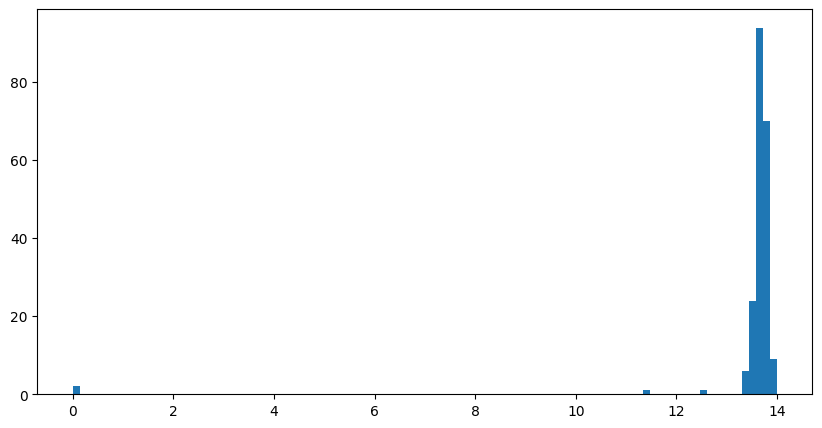

In [64]:
# Histogram of cantidad entregada
plt.figure(figsize=(10, 5))
plt.hist(of['Cantidad entregada'].astype(float), bins=100)
plt.show()

### It seems it follows a normal distribution but some of the values are 0 L . Why is that?

### Look at the duration of the OF which have a quantity delivered of 0

## Save

In [65]:
# Save the cleaned file
of.to_csv('../../data/processed/of.csv', index=False)